In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score

%matplotlib inline

In [2]:
IN_DIR = '/kaggle/input/novosib-in/'

In [3]:
df_train = pd.read_csv(IN_DIR + "train_dataset_train.csv")

## Рассмотрим датасет по ближе

In [4]:
df_train.shape

(4222094, 6)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222094 entries, 0 to 4222093
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   Easting      float64
 2   Northing     float64
 3   Height       float64
 4   Reflectance  float64
 5   Class        int64  
dtypes: float64(4), int64(2)
memory usage: 193.3 MB


# Пояснение к данным
## Столбец «Class» хранит в себе тип класса точки, где:
### 0 – точки земли
### 1 – точки опор
### 3 – точки растительности
### 4 – точки рельсов
### 5 – точки элементов контактной сети
### 64 – точки шумов

In [6]:
# Коды классов для именования подмножеств данных
class_dict = {
    'ground': 0,
    'support': 1,
    'green': 3,
    'rails': 4,
    'wires': 5,
    'noise': 64
}

Пострим на распределение данных

Text(0.5, 1.0, 'Распределение класса точки')

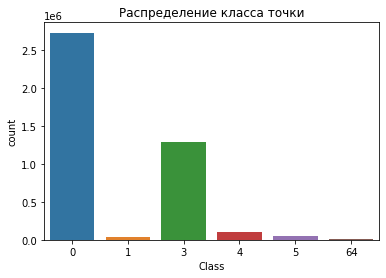

In [7]:
sns.countplot(x = "Class" , data  = df_train).set_title('Распределение класса точки')

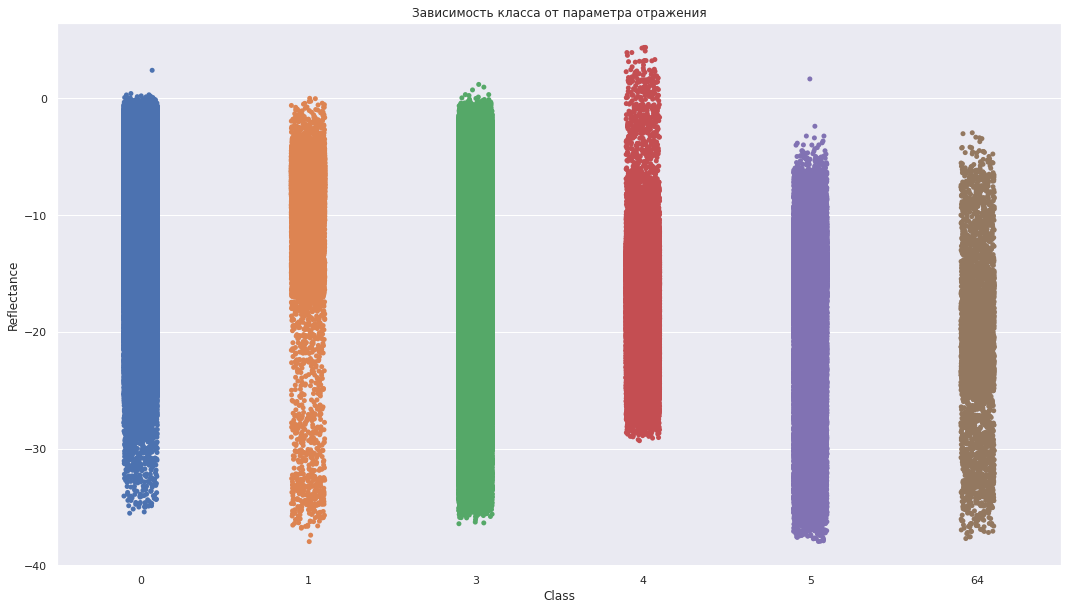

In [8]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Reflectance").set_title('Зависимость класса от параметра отражения');

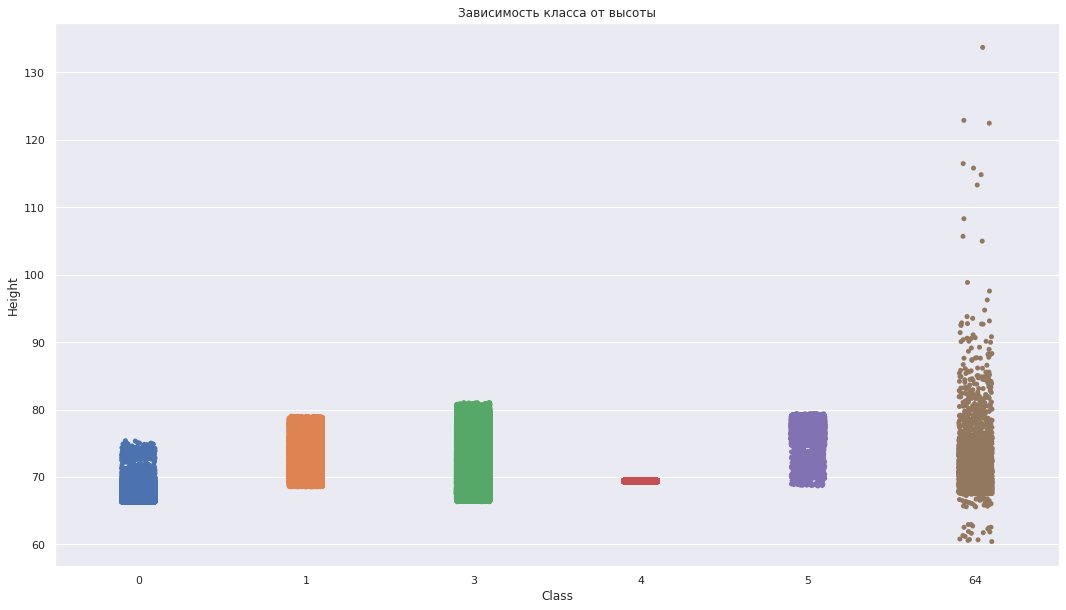

In [9]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Height").set_title('Зависимость класса от высоты');

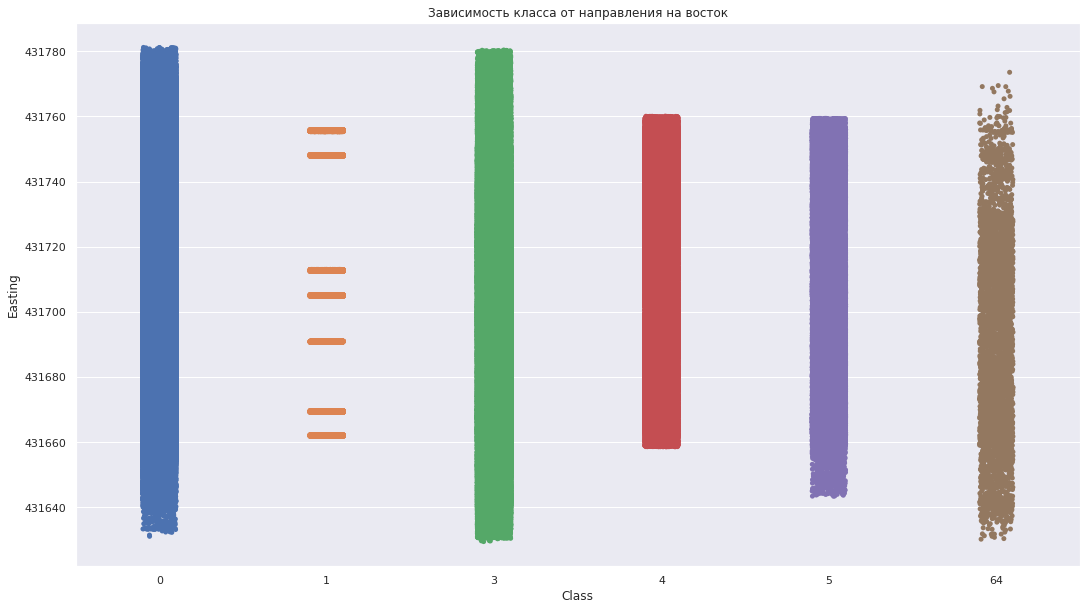

In [10]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Easting").set_title('Зависимость класса от направления на восток');

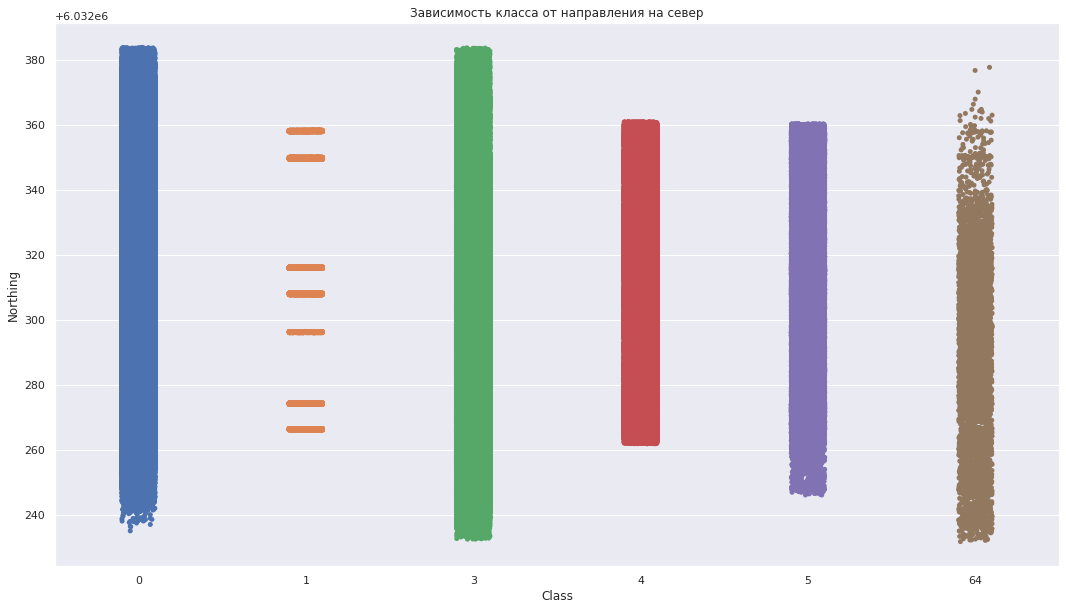

In [11]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Northing").set_title('Зависимость класса от направления на север');

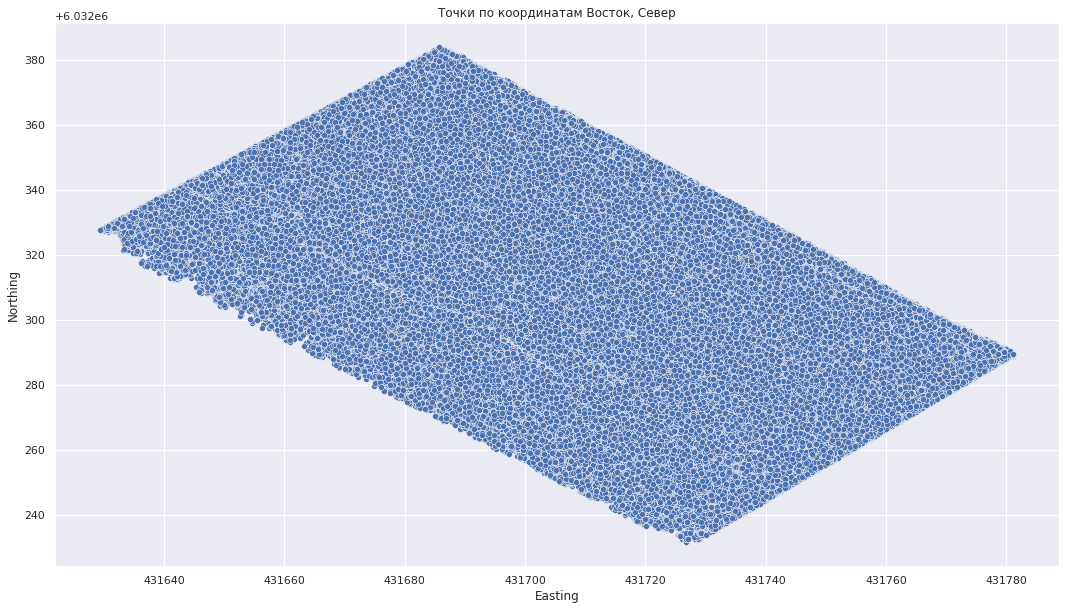

In [12]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_train, x= "Easting", y = "Northing").set_title('Точки по координатам Восток, Север');

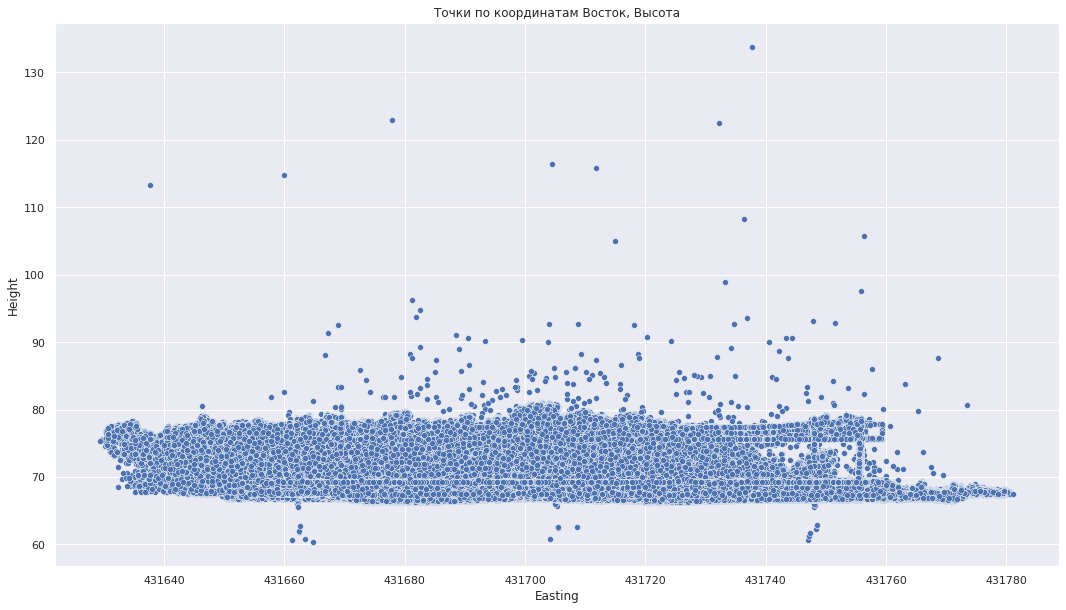

In [13]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_train, x= "Easting", y = "Height").set_title('Точки по координатам Восток, Высота');

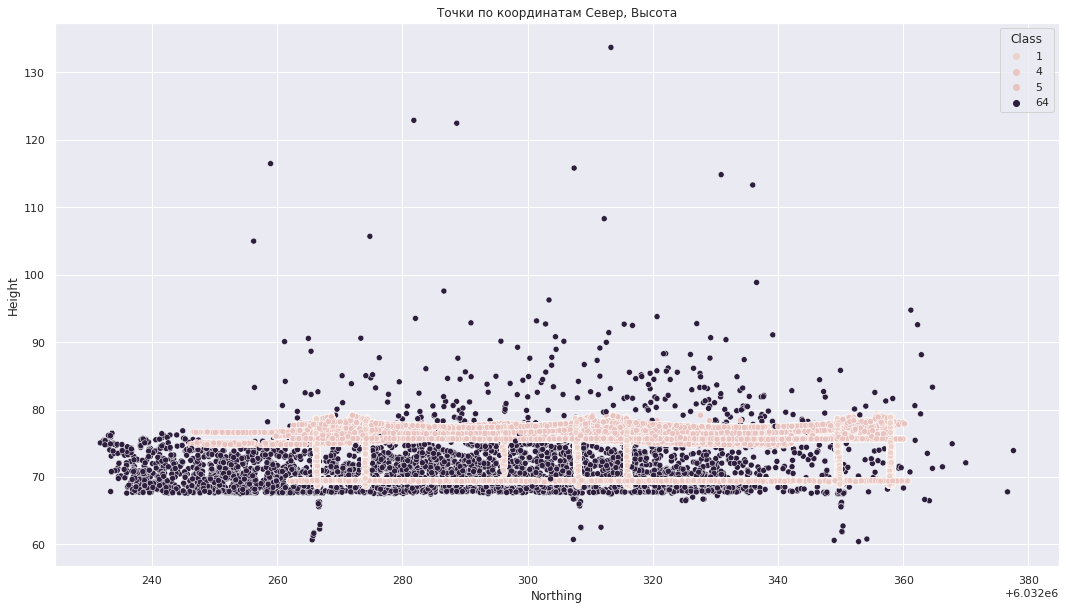

In [14]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_train[~df_train['Class'].isin([0,3])], x= "Northing", y = "Height", hue="Class").set_title('Точки по координатам Север, Высота');

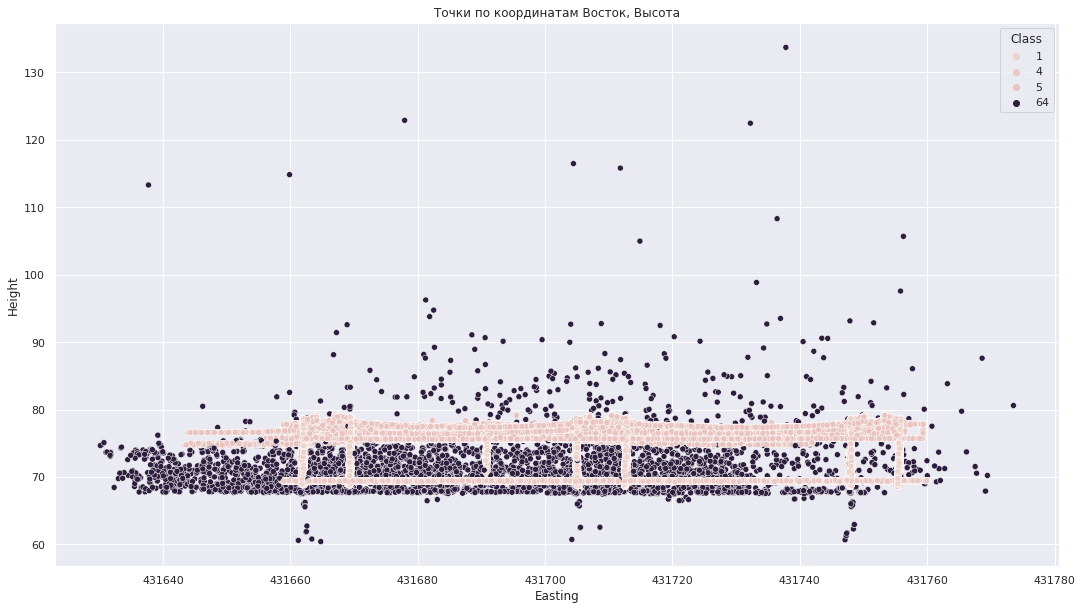

In [15]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_train[~df_train['Class'].isin([0,3])], x= "Easting", y = "Height", hue="Class").set_title('Точки по координатам Восток, Высота');

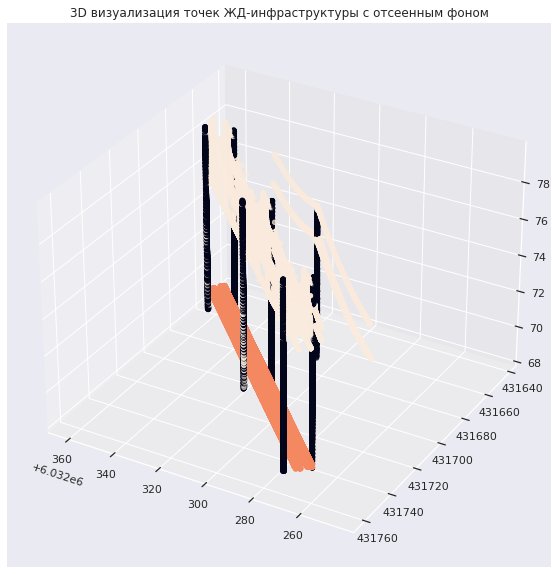

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

data_3d = df_train[~df_train['Class'].isin([0, 3, 64])]

ax.scatter(data_3d['Northing'], data_3d['Easting'], data_3d['Height'], c=data_3d['Class'])

plt.title('3D визуализация точек ЖД-инфраструктуры с отсеенным фоном')

ax.view_init(30, 120)

plt.show()

In [17]:
df_train.groupby(['Class']).count()

,id,Easting,Northing,Height,Reflectance
Class,,,,,
0,2731040,2731040,2731040,2731040,2731040
1,39384,39384,39384,39384,39384
3,1287816,1287816,1287816,1287816,1287816
4,103453,103453,103453,103453,103453
5,55985,55985,55985,55985,55985
64,4416,4416,4416,4416,4416


In [18]:
df_train[~df_train['Class'].isin([0,3])]

,id,Easting,Northing,Height,Reflectance,Class
7,3326167,431747.8350,6.032272e+06,69.4981,-20.24,4
17,5048214,431746.6556,6.032272e+06,77.4229,-30.56,5
19,2251178,431676.2245,6.032345e+06,69.3043,-12.07,4
37,3785386,431685.7229,6.032331e+06,77.3064,-16.96,5
44,2391273,431699.7740,6.032318e+06,77.6741,-28.57,5
...,...,...,...,...,...,...
4221986,2478591,431725.3512,6.032294e+06,69.4672,-22.02,4
4222003,1203740,431730.2666,6.032288e+06,75.6578,-13.44,5
4222008,2620903,431715.3661,6.032301e+06,69.3684,-15.00,4
4222018,541166,431755.3812,6.032274e+06,69.7756,-5.67,1


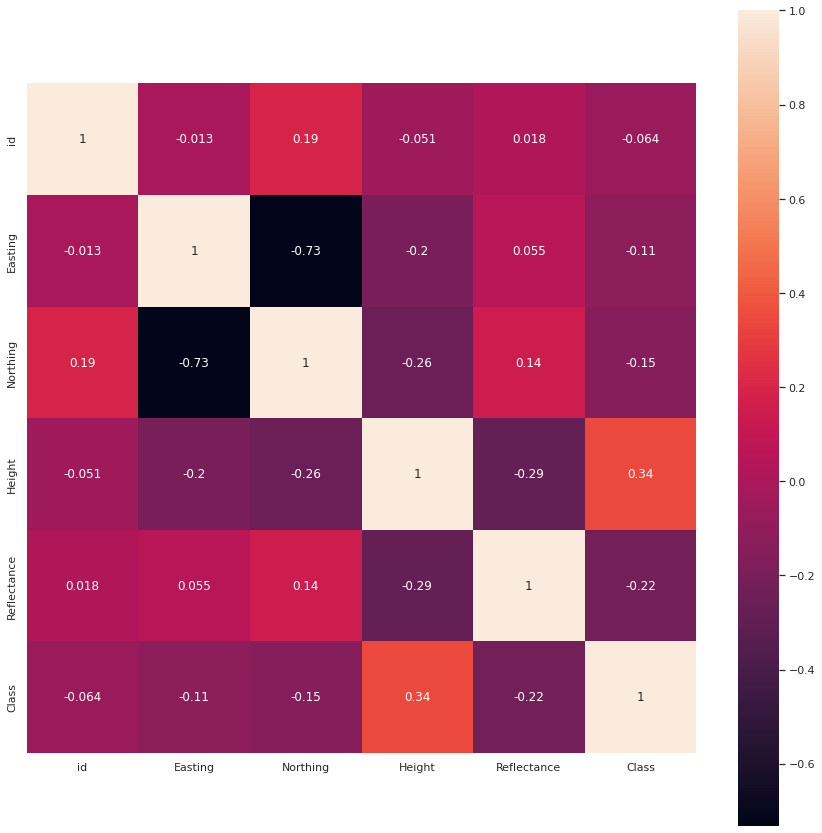

In [19]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

## Выделим выборки

In [20]:
df_train = df_train.fillna(0)

In [21]:
X = df_train.drop(["Class", "id"], axis = 1)
y = df_train[["Class"]]

In [22]:
X.shape

(4222094, 4)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
y_train

,Class
408665,0
1215009,3
568376,0
33256,3
2742206,3
...,...
4044887,0
1136074,3
1570006,3
2234489,0


## Обучение модели

In [25]:
#clf = RandomForestClassifier(random_state=0)

In [26]:
#clf.fit(X_train, y_train)

## Оценка точности

In [27]:
#pred = clf.predict(X_test)

In [28]:
#y_test.head(3)

In [29]:
#result = recall_score(y_test, pred, average='macro', zero_division=True)

#print("Recall score",result)

In [30]:
df_test = pd.read_csv(IN_DIR + "test_dataset_test.csv")

In [31]:
df_test.shape

(1809469, 5)

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809469 entries, 0 to 1809468
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   Easting      float64
 2   Northing     float64
 3   Height       float64
 4   Reflectance  float64
dtypes: float64(4), int64(1)
memory usage: 69.0 MB


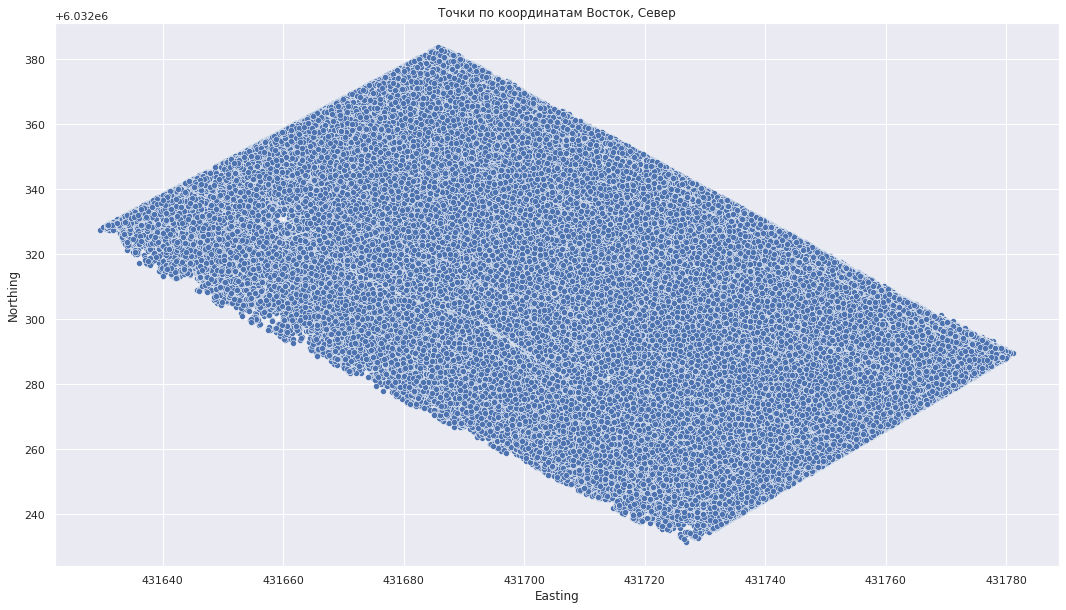

In [33]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_test, x= "Easting", y = "Northing").set_title('Точки по координатам Восток, Север');

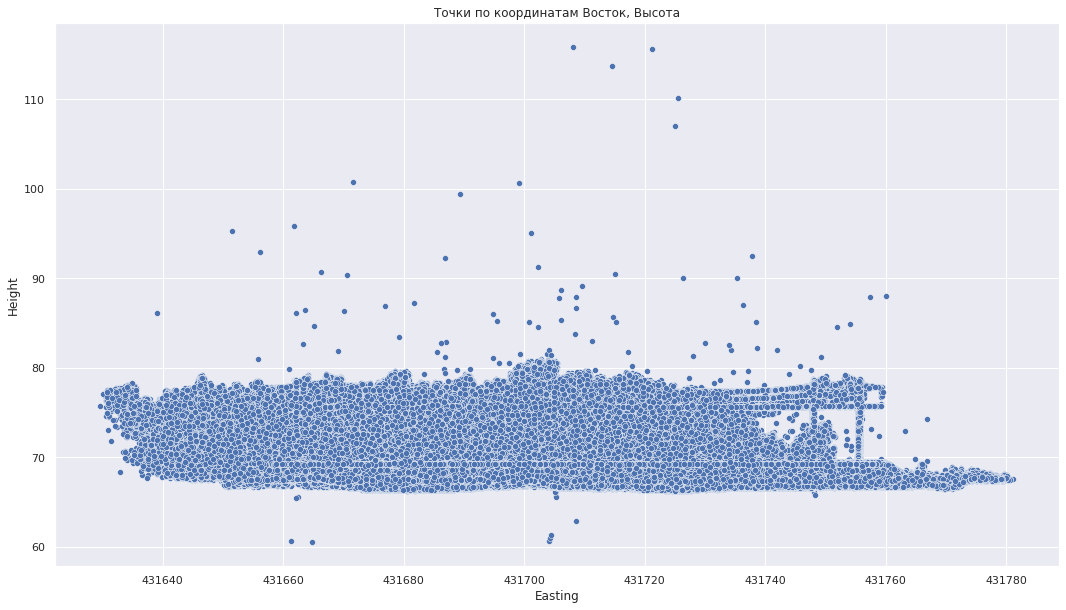

In [34]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_test, x= "Easting", y = "Height").set_title('Точки по координатам Восток, Высота');

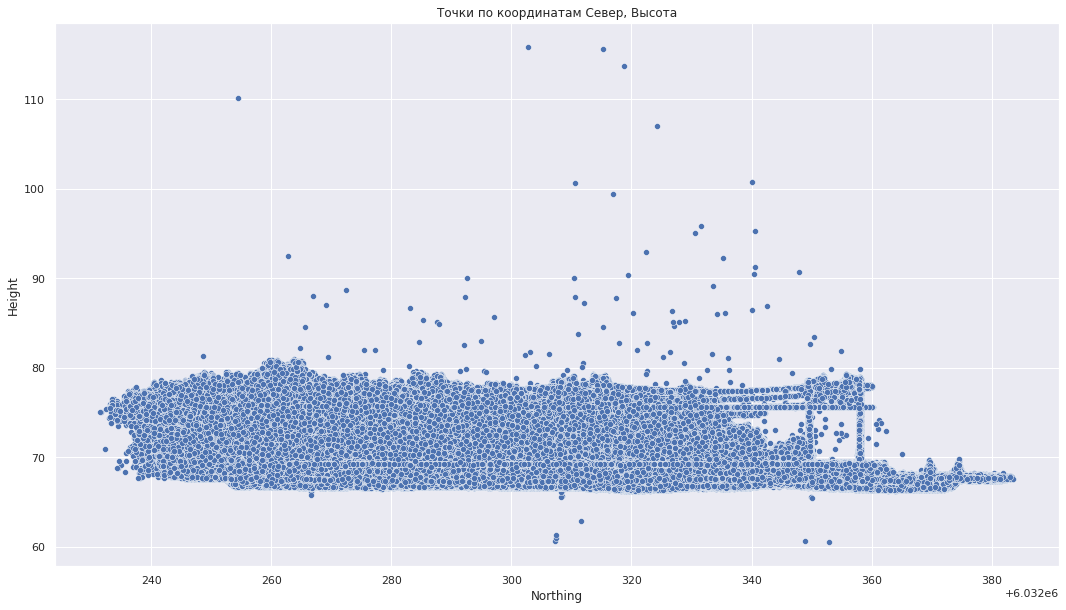

In [35]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_test, x= "Northing", y = "Height").set_title('Точки по координатам Север, Высота');

# Метод KDE (kernel density estimation) оценки распределения точек и их классов

## 1. Выделение точек классов
### 1.1 Приоритетными считаются точки рельсов, опор и элементов контактной сети (значения "Class": 4, 1, 5)
### 1.2 Фон изображения: земля и растительность ("Class": 0, 3) и шумы ("Class": 64) возможно даже имеет смысл отфильтровывать для работы только с информативным сигналом.

## 2. Получение KDE отдельно для классов.
### 2.1 Выделение подмножеств данных для каждого класса (возможно самый многочисленный для земли можно пропустить).
### 2.2 Определение KDE для отдельного класса.
### 2.3 Оценка min и max значений ядерной плотности класса. Min будет использован для порогового значения (threshold) при определении класса.

## 3. Получение предсказаний классов для тестовых точек. Оценка точности предсказания.

In [36]:
# Для смещения координат в 0. Меньше обрабатываемые числа - экономия памяти и ресурсов процессора.
dict_min = {col: df_train[col].min() for col in ['Easting', 'Northing', 'Height', 'Reflectance']}
dict_min

{'Easting': 431629.442,
 'Northing': 6032231.7455,
 'Height': 60.4144,
 'Reflectance': -37.96}

In [51]:
# Конвертация - сдвига к нулю для уменьшения обрабатываемых чисел
df_train_conv = df_train.loc[X_train.index].copy()

# TODO: возможно поворот, чтобы данные были похожи на прямоугольник, улучшит точность

for col in dict_min.keys():
    df_train_conv[col] = df_train_conv[col] - dict_min[col]

df_train_conv.describe()

,id,Easting,Northing,Height,Reflectance,Class
count,2.955465e+06,2.955465e+06,2.955465e+06,2.955465e+06,2.955465e+06,2.955465e+06
mean,3.016558e+06,7.733520e+01,7.599484e+01,8.985817e+00,2.742907e+01,1.156234e+00
std,1.740973e+06,2.977408e+01,2.981463e+01,2.268664e+00,4.513365e+00,2.549409e+00
min,1.206000e+03,1.929000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.508815e+06,5.307150e+01,5.188630e+01,7.376100e+00,2.533000e+01,0.000000e+00
50%,3.015337e+06,7.742740e+01,7.553370e+01,8.790400e+00,2.802000e+01,0.000000e+00
75%,4.523763e+06,1.013249e+02,1.004047e+02,8.884800e+00,3.023000e+01,3.000000e+00
max,6.032767e+06,1.516907e+02,1.519835e+02,7.330410e+01,4.232000e+01,6.400000e+01


In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

"""
Возвращает объект KDE для поданных на вход точек
"""
def get_kde(points_list, var_type='ccc', bw='normal_reference'):
    dens_u = sm.nonparametric.KDEMultivariate(data=points_list, var_type=var_type, bw=bw)
    pdf_points = ''

    return dens_u

"""
Вычисляет значения плотности точек PDF для поданных на вход точек и их PDF
"""
def get_pdf_points(dens_u, points_list):
    pdf_col = []
    for point in points_list:
        pdf_col.append(np.log10(dens_u.pdf(data_predict=point)))
        
    return pdf_col

In [54]:
points_list = df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]),
                              ['Easting', 'Northing', 'Height']].to_numpy().tolist()

dens_u = get_kde(points_list)

In [57]:
len(points_list)

72526

In [58]:
points_list[:10]

[[87.06599999999162, 77.01669999957085, 8.896],
 [33.209499999997206, 121.02570000011474, 9.028400000000005],
 [46.54450000001816, 110.13769999984652, 9.056399999999996],
 [115.70829999999842, 48.935099999420345, 9.019599999999997],
 [81.96990000002552, 79.58440000005066, 9.026899999999998],
 [66.98250000004191, 88.11869999952614, 8.895899999999997],
 [37.976699999999255, 116.31240000016987, 8.905900000000003],
 [70.39970000000903, 84.62229999992996, 8.8947],
 [106.6932000000379, 57.7496999995783, 8.947199999999995],
 [105.54700000002049, 50.61589999962598, 9.052999999999997]]

In [59]:
pdf_list = get_pdf_points(dens_u, points_list)

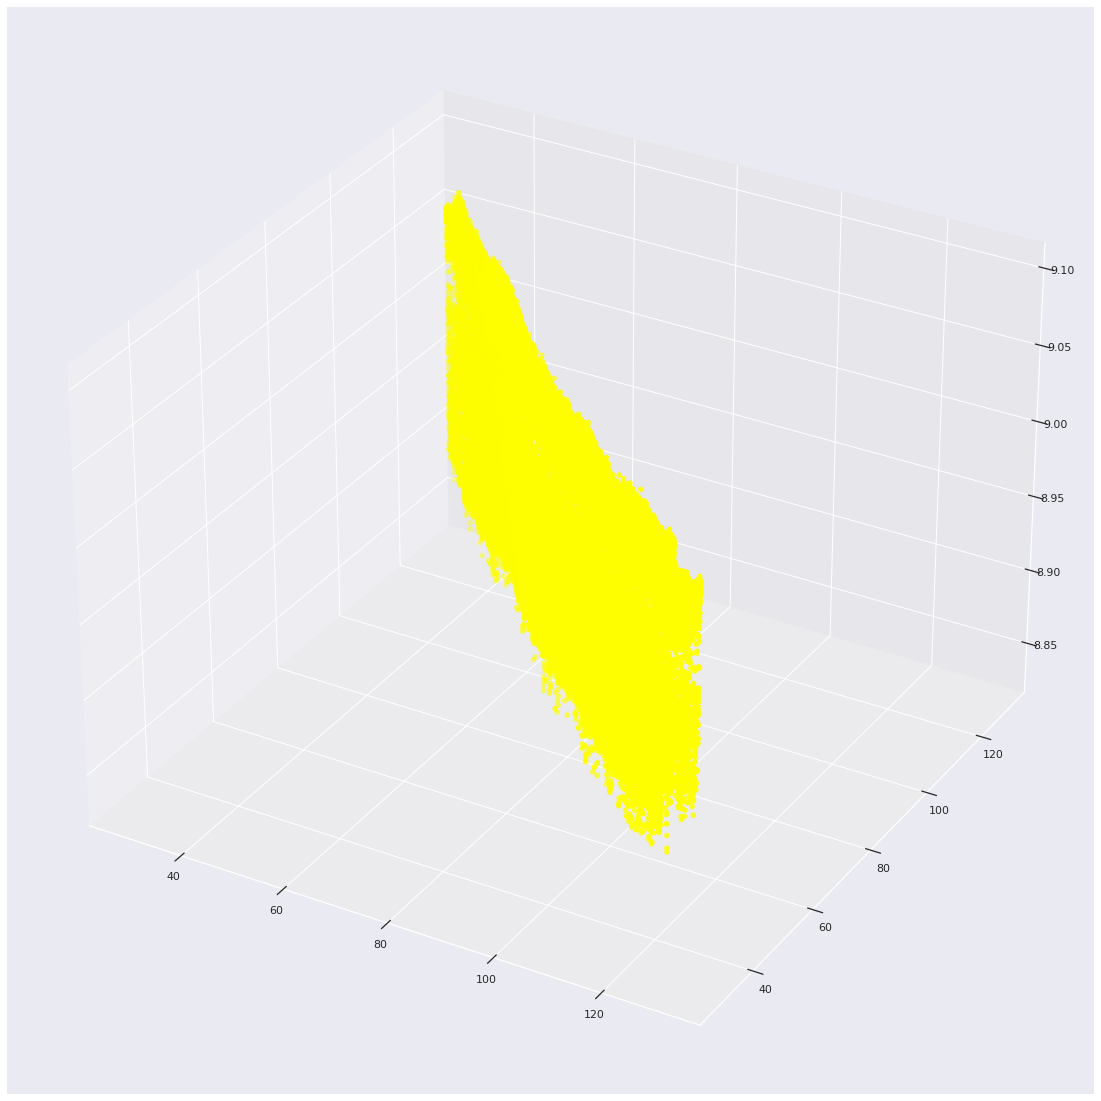

In [60]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(projection='3d')
ax.scatter(df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]), ['Easting']],
           df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]), ['Northing']],
           #df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]), ['Height']],
           df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]), ['Height']],
           pdf_list,
           c='yellow')

plt.show()

In [61]:
min(pdf_list), max(pdf_list)

(-4.380425121294851, -2.327300323689088)

In [62]:
df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]), ['Easting', 'Northing', 'Height']]

,Easting,Northing,Height
3737251,87.0660,77.0167,8.8960
3865346,33.2095,121.0257,9.0284
2852602,46.5445,110.1377,9.0564
2562322,115.7083,48.9351,9.0196
3687168,81.9699,79.5844,9.0269
...,...,...,...
3117697,130.3746,34.7825,9.0665
4216263,67.4660,87.6291,9.0587
1575557,50.6895,110.0330,8.8548
109556,51.3901,103.2738,8.9409


In [63]:
class_dict

{'ground': 0, 'support': 1, 'green': 3, 'rails': 4, 'wires': 5, 'noise': 64}

In [64]:
dens_u_dict = { cls_name: get_kde(df_train_conv.loc[df_train_conv['Class'].isin([class_dict[cls_name]]),
                              ['Easting', 'Northing', 'Height']].to_numpy().tolist()) for cls_name in class_dict}

In [68]:
dens_u_dict

{'ground': KDE instance
 Number of variables: k_vars = 3
 Number of samples:   nobs = 1912280
 Variable types:      ccc
 BW selection method: normal_reference,
 'support': KDE instance
 Number of variables: k_vars = 3
 Number of samples:   nobs = 27533
 Variable types:      ccc
 BW selection method: normal_reference,
 'green': KDE instance
 Number of variables: k_vars = 3
 Number of samples:   nobs = 900836
 Variable types:      ccc
 BW selection method: normal_reference,
 'rails': KDE instance
 Number of variables: k_vars = 3
 Number of samples:   nobs = 72526
 Variable types:      ccc
 BW selection method: normal_reference,
 'wires': KDE instance
 Number of variables: k_vars = 3
 Number of samples:   nobs = 39144
 Variable types:      ccc
 BW selection method: normal_reference,
 'noise': KDE instance
 Number of variables: k_vars = 3
 Number of samples:   nobs = 3146
 Variable types:      ccc
 BW selection method: normal_reference}

In [113]:
points_test_list = X_test.apply(lambda row: [row.Easting - dict_min['Easting'],
                                             row.Northing - dict_min['Northing'],
                                             row.Height - dict_min['Height']],
                                axis=1).to_list()

In [114]:
points_test_list[:10]

[[90.03700000001118, 72.56779999937862, 8.793899999999994],
 [100.375800000038, 40.3843999998644, 8.200500000000005],
 [51.26699999999255, 113.18279999960214, 8.732399999999998],
 [97.64100000000326, 70.42819999996573, 8.154300000000006],
 [43.97200000000885, 115.52680000010878, 8.837000000000003],
 [63.82190000003902, 108.93800000008196, 7.121899999999997],
 [98.98600000003353, 64.49349999986589, 8.824100000000001],
 [98.71140000002924, 25.379199999384582, 8.577299999999994],
 [132.60610000003362, 42.930399999953806, 7.010499999999993],
 [53.81739999999991, 84.23929999954998, 6.914699999999996]]

In [16]:
for key, val in dens_u_dict.items():
    print(key, val)

ground KDE instance
Number of variables: k_vars = 3
Number of samples:   nobs = 1912280
Variable types:      ccc
BW selection method: normal_reference

support KDE instance
Number of variables: k_vars = 3
Number of samples:   nobs = 27533
Variable types:      ccc
BW selection method: normal_reference

green KDE instance
Number of variables: k_vars = 3
Number of samples:   nobs = 900836
Variable types:      ccc
BW selection method: normal_reference

rails KDE instance
Number of variables: k_vars = 3
Number of samples:   nobs = 72526
Variable types:      ccc
BW selection method: normal_reference

wires KDE instance
Number of variables: k_vars = 3
Number of samples:   nobs = 39144
Variable types:      ccc
BW selection method: normal_reference

noise KDE instance
Number of variables: k_vars = 3
Number of samples:   nobs = 3146
Variable types:      ccc
BW selection method: normal_reference



In [52]:
pdf_class_list = []

max_val_list = []
max_class_list = []
max_num_code = []

min_val_list = []
min_class_list = []

class_list = list(class_dict.keys())
class_list

['ground', 'support', 'green', 'rails', 'wires', 'noise']

In [53]:
with np.errstate(divide='ignore'):
    # Для проверки подхода считаем только для 100 тестовых точек, т.к. пока вычислительно было затратно.
    for point in points_test_list[:100]:
        pdf_vals = []
        for cls, d_u in dens_u_dict.items():
            pdf_vals.append(np.log10(d_u.pdf(point)))
        max_val = max(pdf_vals)
        max_val_list.append(max_val)
        max_cls = class_list[pdf_vals.index(max_val)]
        max_class_list.append(max_cls)
        max_num_code.append(class_dict[max_cls])
        
        min_val_list.append(min(pdf_vals))
        min_class_list.append(class_list[pdf_vals.index(min(pdf_vals))])
        
        pdf_class_list.append(pdf_vals)

In [54]:
max_class_list

['ground',
 'green',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'green',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'green',
 'ground',
 'ground',
 'ground',
 'ground',
 'green',
 'green',
 'ground',
 'ground',
 'green',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'green',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'rails',
 'green',
 'ground',
 'green',
 'green',
 'ground',
 'ground',
 'green',
 'ground',
 'green',
 'ground',
 'ground',
 'ground',
 'ground',
 'green',
 'ground',
 'ground',
 'green',
 'green',
 'ground',
 'ground',
 'ground',
 'ground',
 'green',
 'ground',
 'ground',
 'green',
 'ground',
 'green',
 'ground',
 'ground',
 'ground',
 'ground',
 'green',
 'green',
 'rails',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'green',
 'ground',
 'rails',
 'ground',
 'ground',
 'ground',
 'ground',
 'ground',
 'green',
 'ground',
 'green',
 'g

In [57]:
max_num_code

[0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 4,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 3,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [58]:
y_test[:100]

,Class
425195,0
2706866,3
1606913,0
2967152,0
3659472,0
...,...
411092,0
154472,0
3825394,0
3621299,0


In [59]:
# NOTE: для 10 точек было около 0.83

# Для 100 точек получилось около 0.94
# Т.е. метод применим. Весь вопрос в оптимизации и вычислительной затратности.
recall_score(y_test[:100], max_num_code, average='macro', zero_division=True)

0.9395855286266245

In [2]:
# Так слишком долго считает.

# Выдавало: RuntimeWarning: divide by zero encountered in log10
# Игнорируеется выражением with
with np.errstate(divide='ignore'):
    get_pdf_points(dens_u, points_test_list)

# K-means Clustering with Prediction

In [4]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

#kmeans.predict([[0, 0], [12, 3]])

#kmeans.cluster_centers_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [88]:
class_dict

{'ground': 0, 'support': 1, 'green': 3, 'rails': 4, 'wires': 5, 'noise': 64}

In [91]:
no_noise_points = df_train_conv.loc[~df_train_conv['Class'].isin([class_dict['noise']]),
                                 ['Easting', 'Northing', 'Height']].to_numpy()

In [100]:
# Классы пронумерованы по порядку, в отличие от нумерации в таблице
kmeans_no_noise=KMeans(n_clusters=5, random_state=0).fit(no_noise_points)
kmeans_no_noise.labels_

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [108]:
kmeans_no_noise_pred = kmeans_no_noise.predict(no_noise_points[:100])
kmeans_no_noise_pred

array([0, 2, 0, 2, 2, 0, 1, 1, 3, 0, 3, 4, 1, 4, 1, 2, 3, 3, 2, 1, 0, 0,
       0, 2, 4, 0, 1, 2, 0, 4, 0, 1, 3, 4, 2, 1, 2, 3, 4, 1, 0, 1, 0, 3,
       1, 1, 1, 4, 1, 3, 4, 3, 0, 2, 1, 0, 0, 3, 3, 0, 3, 3, 3, 0, 4, 2,
       1, 3, 1, 1, 2, 1, 3, 1, 3, 0, 0, 0, 1, 1, 4, 4, 0, 3, 4, 1, 0, 4,
       4, 0, 2, 2, 4, 3, 0, 3, 0, 3, 1, 3], dtype=int32)

In [105]:
# Нумерация классов отличается от kmeans_no_noise, но можно посмотреть характерную картину
y_test[:100].to_numpy()

array([[0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [3],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [3],
       [3],
       [0],
       [0],
       [3],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [3],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [4],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
    

<BarContainer object of 100 artists>

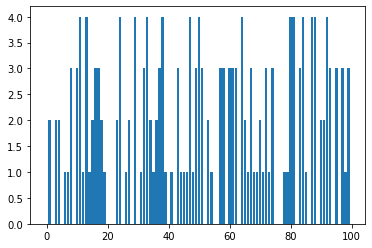

In [115]:
plt.bar(range(kmeans_no_noise_pred.shape[0]), kmeans_no_noise_pred)

In [126]:
y_test[:100].to_numpy().flatten()

array([0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0])

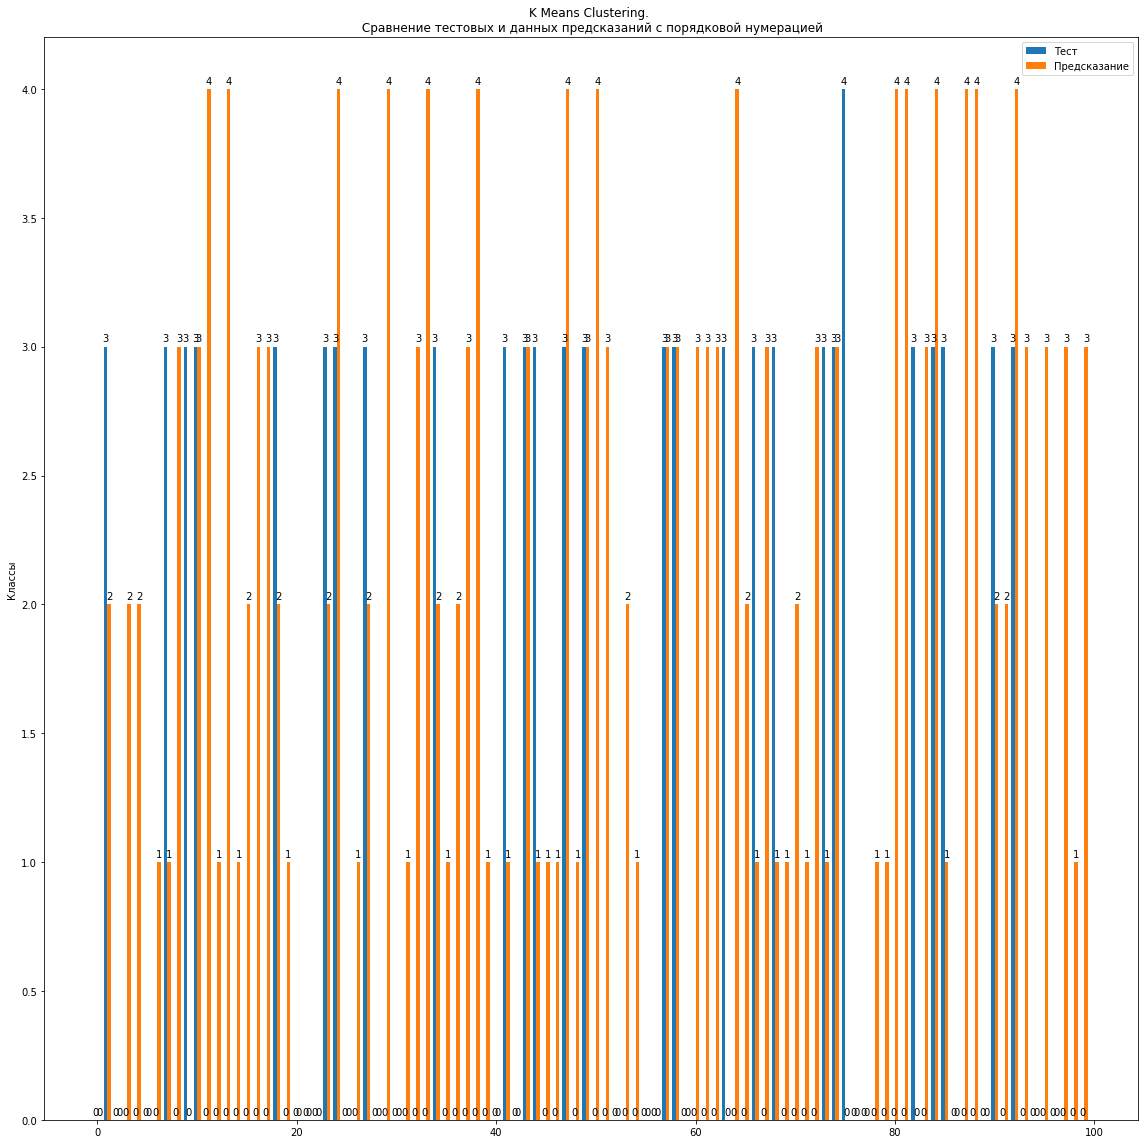

In [130]:
#labels = ['G1', 'G2', 'G3', 'G4', 'G5']
#men_means = [20, 34, 30, 35, 27]
#women_means = [25, 32, 34, 20, 25]

x = np.arange(kmeans_no_noise_pred.shape[0])  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,16))
rects1 = ax.bar(x - width/2, y_test[:100].to_numpy().flatten(), width, label='Тест')
rects2 = ax.bar(x + width/2, kmeans_no_noise_pred, width, label='Предсказание')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Классы')
ax.set_title('K Means Clustering. \n Сравнение тестовых и данных предсказаний с порядковой нумерацией')
#ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# **Сравнительное поведения индексов классов совпадают недостаточно хорошо. В таком виде метод K Means Clustering вряд ли применим. Да и вообще методы кластеризации с учителем редко применяются для предсказаний.**